# Modelisation of luminosity and flux bias

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022-04-22
- update : 2022-04-25


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline, interp1d
from scipy.special import erfc
import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))

In [3]:
# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.left': True,
          'figure.figsize': [18, 10],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

In [4]:
import scipy.special as sc

# Luminosity function


- The distribution of the luminosity
of a galaxy follow the function called the Schlechter function:

- https://en.wikipedia.org/wiki/Luminosity_function_(astronomy)

- https://sites.astro.caltech.edu/~george/ay21/eaa/eaa-glf.pdf

- https://www.astro.umd.edu/~richard/ASTRO620/LumFunction-pp.pdf



$$
{\displaystyle n(L)\ \mathrm {d} L=\phi ^{*}\left({\frac {L}{L^{*}}}\right)^{\alpha }\mathrm {e} ^{-L/L^{*}}{\frac {\mathrm {d} L}{L^{*}}},}
$$

where 

$$
{\displaystyle \alpha =-1.25,\ \phi ^{*}=1.2\times 10^{-2}\ h^{3}\ \mathrm {Mpc} ^{-3}}
$$

Let us define:
$$
\alpha = k-1
$$

In [5]:
K = [-4.1, -3.1, -2.1, -1.99, -1.01, -0.99 , -0.5, -0.25, 0, 0.75, 1,2,3,4]
NK=len(K)
h=6.62607015e-34 #/ ((3.085678e22)**2)
phiStar=1.2e-2 * h**(-3)
Ntot=phiStar*sc.gamma(K)
print(Ntot)

[-1.50135178e+97  6.15554228e+97 -1.90821811e+98  2.08187005e+99
  4.10803840e+99 -4.14292140e+99 -1.46223808e+98 -2.02188730e+98
             inf  5.05471825e+97  4.12489747e+97  4.12489747e+97
  8.24979493e+97  2.47493848e+98]


In [6]:
palette = itertools.cycle(sns.color_palette("hls", NK))

In [7]:
x=np.linspace(0.01,50.,100)

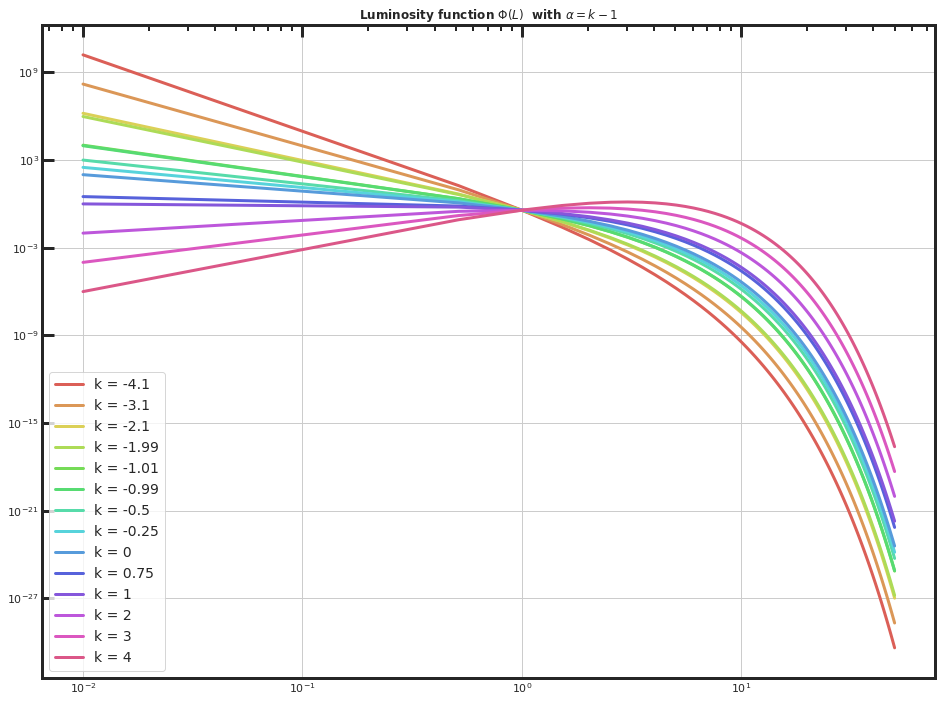

In [8]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
for k in K:
    y=np.exp((k-1)*np.log(x))*np.exp(-x)
    ax.plot(x,y,color=next(palette),label="k = "+str(k))
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Luminosity function $\\Phi(L)$  with $\\alpha = k-1$",weight="bold")
ax.grid()

## relation of the Luminosity function with the Gamma distribution and the Gamma function

### The Gamma functions
- https://en.wikipedia.org/wiki/Gamma_function

- https://en.wikipedia.org/wiki/Incomplete_gamma_function


- Ordinary Gamma function : $\Gamma(s) = \int_0^\infty t^{s-1} e^{-t} dt$
- Upper incomplete Gamma function : $\Gamma(s,x) = \int_x^\infty t^{s-1} e^{-t} dt$
- Lower incomplete Gamma function : $\gamma(s,x) = \int_0^x t^{s-1} e^{-t} dt$



with

$$
\Gamma(s) = \Gamma(s,x) = \lim_{x \rightarrow \infty} \gamma(s,x)
$$

$$
\Gamma(s) = \Gamma(s,x) + \gamma(s,x)
$$

### The Gamma distribution

https://fr.wikipedia.org/wiki/Loi_Gamma


$$
{\displaystyle f(x;k,\theta )={\frac {x^{k-1}\mathrm {e} ^{-{\frac {x}{\theta }}}}{\Gamma (k)\theta ^{k}}}}
$$


### Relation between The Gamma distribution and the Luminosity function

- $x = \frac{L}{L^*}$
- $\theta = 1$

- The normalised Probability density function for the luminosity function os  

$$
\phi(L) dL =  \frac{x^{k-1} e^{-x}}{\Gamma(k)} dx
$$

#### Average

$$
\overline{L} =  L^* \int_0^\infty x  \frac{x^{k-1} e^{-x}}{\Gamma(k)} dx =  L^* \frac{\Gamma(k+1)}{\Gamma(k)}
$$

- this gives the definition of $L^*$ for a known $\overline{L}$ and fixed $k = \alpha + 1$

### Plot upper incomplete Gamma function

In [9]:
def gammaincc_ext(k, x):
    if k>=0.:
        y = sc.gammaincc(k, x)
    #elif k > -1:
    #    y = (1/k)*( sc.gammaincc(k+1, x) - np.power(x, k)/np.exp(x) )
    else: #recursive call
        y = ( 1/(k*sc.gamma(k)) ) * ( gammaincc_ext(k+1., x)*sc.gamma(k+1.) - np.float_power(x, k)*np.exp(-x) )
    return y

def gamma_ext(k):
    if k>-1. and k<0.:
        y = (1/k)*( sc.gamma(k+1.) )
    else:
        y = sc.gamma(k)
    return y

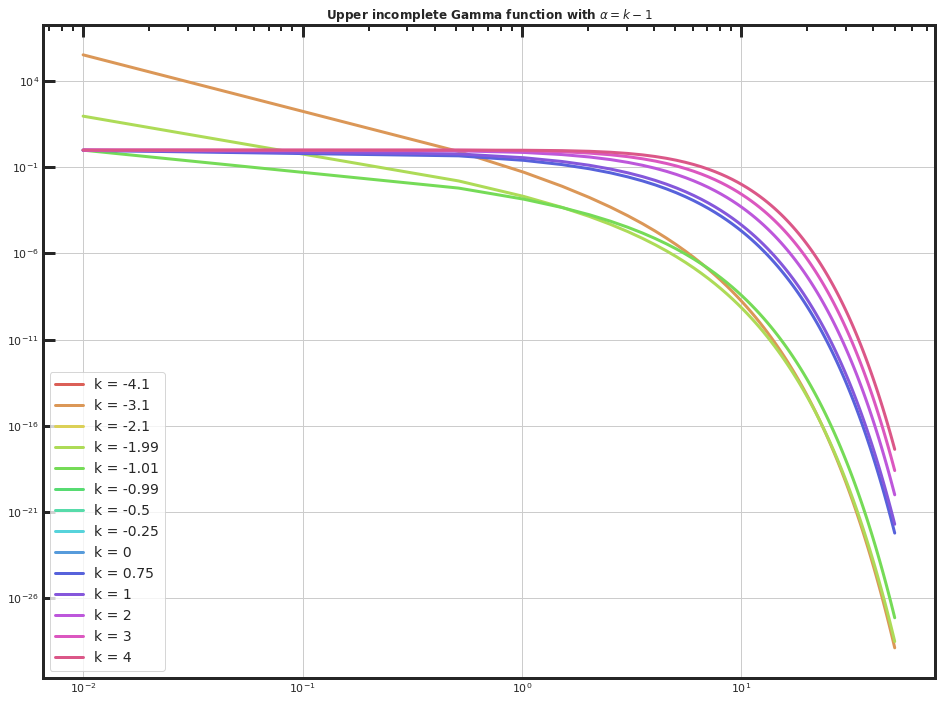

In [10]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
for k in K:
    ax.plot(x, gammaincc_ext(k, x), color=next(palette), label="k = {}".format(k))
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Upper incomplete Gamma function with $\\alpha = k-1$",weight="bold")
ax.grid()

- we see the incomplete Gamma function is defined for $k\ge 0$

# Bias

- If there is a detection threshold for the luminosity $L> L_{min}$ , the new average is:

$$
\overline{L_{biased}} = \int_{L_{min}}^\infty L \phi(L) dL = L^*  
\frac{ \int_{x_{min}}^\infty x^{k} e^{-x} dx}{   \int_{x_{min}}^\infty x^{k-1} e^{-x} dx}  = L^* \frac{\Gamma(k+1,x_{min})}{\Gamma(k,x_{min})}
$$



where $x_{min} = \frac{L_{min}}{L^*}$.



This can be written as :
$$
\frac{\overline{L_{biased}}}{\overline{L}} = \frac{\Gamma(k+1,x_{min})}{\Gamma(k+1)} \times \frac{\Gamma(k)}{\Gamma(k,x_{min})}
$$

In [11]:
K0 = 0
xmin = np.logspace(-10, np.log10(5), 100)

In [12]:
def Lbar(k, Lstar=1.0):
    return Lstar * sc.gamma(k+1.) / sc.gamma(k)

def Lbiased(k, xmin, Lstar=1.0):
    return Lstar * ( gammaincc_ext(k+1., xmin) * sc.gamma(k+1.) ) / ( gammaincc_ext(k, xmin) * sc.gamma(k) )


def bias(x,k, Lstar=1.0):
    """
    \frac{\overline{L_{biased}}}{\overline{L}} = \frac{\Gamma(k+1,x_{min})}{\Gamma(k+1)} \times \frac{\Gamma(k)}{\Gamma(k,x_{min})}
    
    
    input arg:
     - x : detection thresold in unit of L*
     - k = alpha + 1
    """
    
    #bias = sc.gammaincc(k+1, x)/sc.gammaincc(k, x) * sc.gamma(k) / sc.gamma(k+1)
    bias = gammaincc_ext(k+1, x)/gammaincc_ext(k, x) #(1/k) # because Gamma(k+1) = k*Gamma(k) - requires k non-zero
    #bias = Lbiased(k, x, Lstar=Lstar) / Lbar(k, Lstar=Lstar)
    return bias

/tmp/ipykernel_2360/2015600604.py:19: RuntimeWarning: divide by zero encountered in true_divide
  bias = gammaincc_ext(k+1, x)/gammaincc_ext(k, x) #(1/k) # because Gamma(k+1) = k*Gamma(k) - requires k non-zero


Text(0.5, 1.0, 'Bias vs detection threhold')

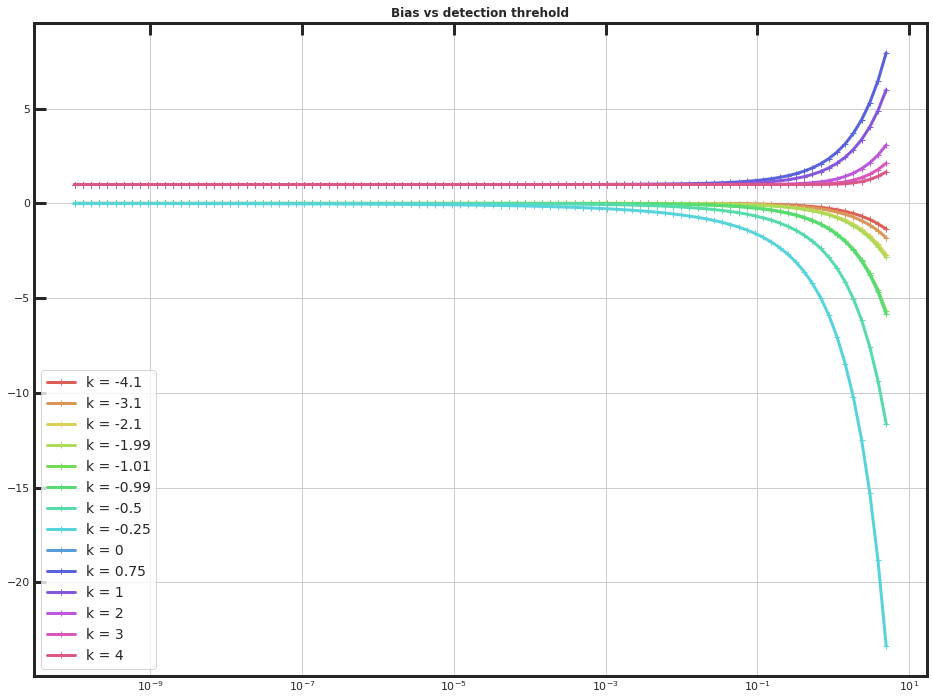

In [13]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
for k in K:
    ax.plot(xmin,bias(xmin,k),color=next(palette), marker='+', label="k = "+str(k))
#ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
ax.grid()
ax.set_title("Bias vs detection threhold",weight="bold")

- obviously for analytical expression , one should use $k=1$

/tmp/ipykernel_2360/2015600604.py:5: RuntimeWarning: invalid value encountered in multiply
  return Lstar * ( gammaincc_ext(k+1., xmin) * sc.gamma(k+1.) ) / ( gammaincc_ext(k, xmin) * sc.gamma(k) )


Text(0.5, 1.0, 'Average Luminosity vs detection threshold with $L^{*} = $1.0')

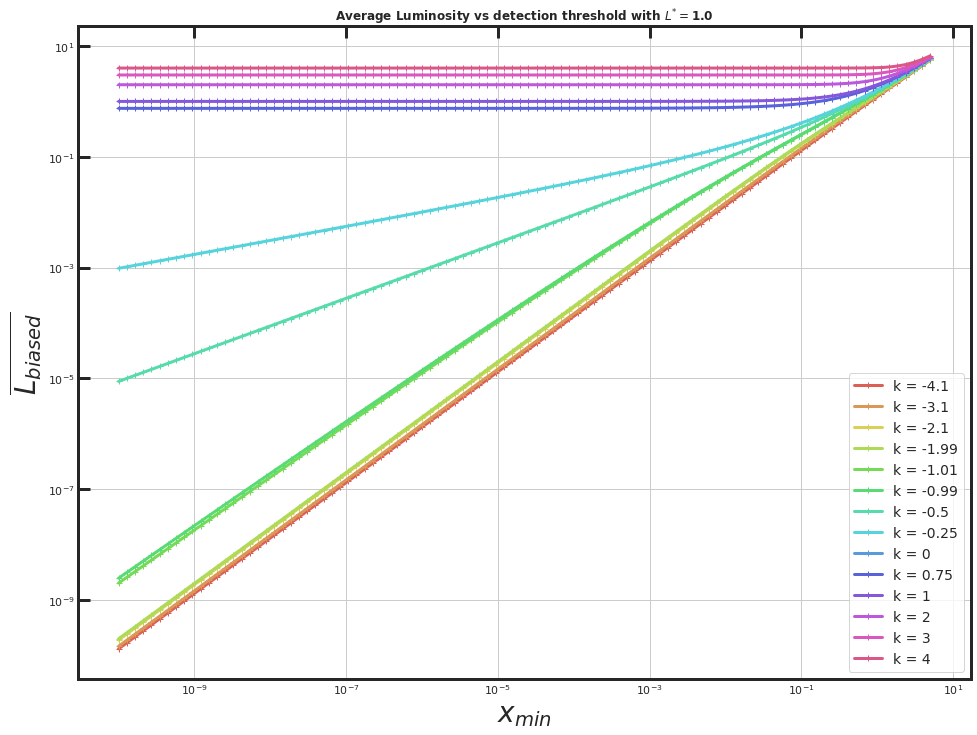

In [14]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
Lstar=1.0
for k in K:
    ax.plot(xmin,Lbiased(k,xmin, Lstar=Lstar),color=next(palette), marker='+',label="k = "+str(k))
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("$x_{min}$")
ax.set_ylabel("$\overline{L_{biased}}$")
ax.legend()
ax.grid()
ax.set_title("Average Luminosity vs detection threshold with $L^{*} = $"+str(Lstar),weight="bold")

Text(0.5, 1.0, 'Average Luminosity vs k with $L^{*} = $1.0')

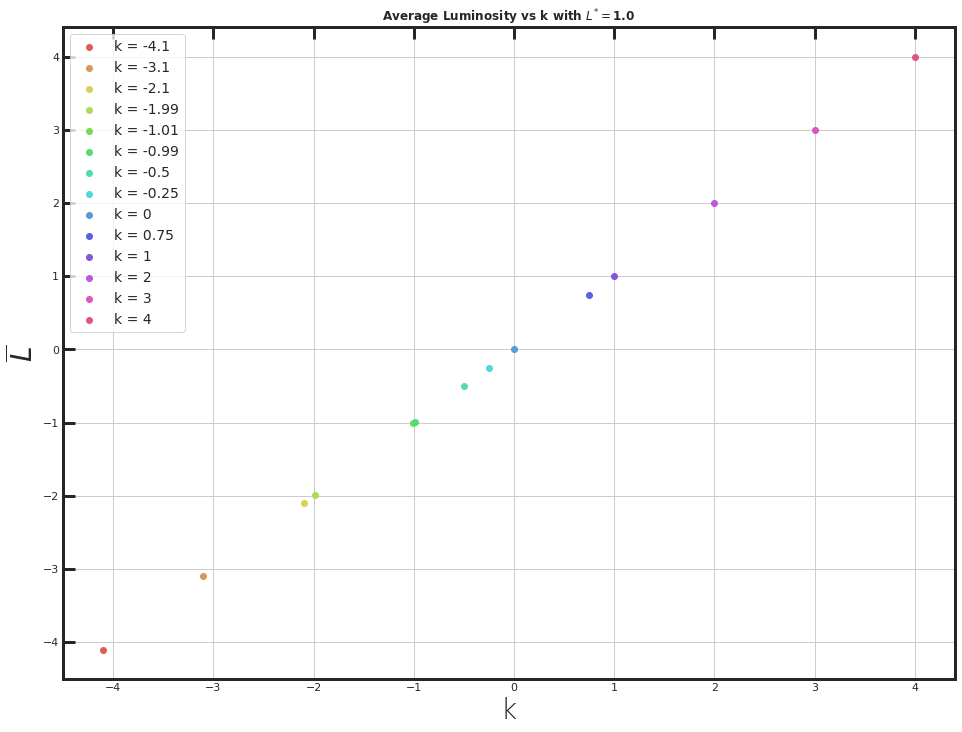

In [15]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
for k in K:
    ax.scatter(k,Lbar(k, Lstar=Lstar),color=next(palette),label="k = "+str(k))
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("k")
ax.set_ylabel("$\overline{L}$")
ax.legend()
ax.grid()
ax.set_title("Average Luminosity vs k with $L^{*} = $"+str(Lstar),weight="bold")